#  Using Transfer Learning and TensorFlow 2.0 to Classify Different Pokemons


In [4]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.12.0
Hub version: 0.13.0
GPU available (YESS!!!!)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !unzip '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages.zip' -d '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/'

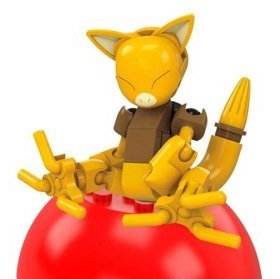

In [11]:
from IPython.display import display, Image
Image('/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/2fd28e699b7c4208acd1637fbad5df2d.jpeg')

In [12]:
import os
def get_image_filenames(custom_path):
  return [custom_path + fname for fname in os.listdir(custom_path)]

In [13]:
file_dirs = get_image_filenames('/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/')
file_dirs[:10]

['/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra',
 '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Aerodactyl',
 '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Alakazam',
 '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Alolan Sandslash',
 '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Arbok',
 '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Arcanine',
 '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Articuno',
 '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Beedrill',
 '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Bellsprout',
 '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Blastoise']

In [14]:
pokemon_names = []
for dir in file_dirs:
  pokemon_names.append(dir.split('/')[-1])

In [15]:
def get_images_dir(path):
  images_dir = []
  for dir in path:
    cont = 0
    for img in os.listdir(dir):
      images_dir.append(dir+'/'+img)
  return images_dir

In [17]:
image_dirs = get_images_dir(file_dirs)
for dir in image_dirs:
  if dir.split('/')[-1][-4:] not in ['.png', '.jpg', 'jpeg']:
    image_dirs.remove(dir)

In [18]:
pokemon_name_dir = [x.split('/')[-2] for x in image_dirs]
pokemon_name_dir[:10]


['Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra']

In [19]:


import pandas as pd
labels_df = pd.DataFrame({'id' : image_dirs, 'name' : pokemon_name_dir})
labels_df.head()



,id,name
0,/content/drive/MyDrive/back/anaconda/datasets/...,Abra
1,/content/drive/MyDrive/back/anaconda/datasets/...,Abra
2,/content/drive/MyDrive/back/anaconda/datasets/...,Abra
3,/content/drive/MyDrive/back/anaconda/datasets/...,Abra
4,/content/drive/MyDrive/back/anaconda/datasets/...,Abra


In [20]:
def save_df_to_csv(path, df, name):
  full_path = path+name
  df.to_csv(full_path, encoding='utf-8', index=False)

save_df_to_csv('/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/', labels_df, 'labels2.csv')

In [21]:
import pandas as pd
labels_csv = pd.read_csv('/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/labels2.csv')
labels_csv.head()

,id,name
0,/content/drive/MyDrive/back/anaconda/datasets/...,Abra
1,/content/drive/MyDrive/back/anaconda/datasets/...,Abra
2,/content/drive/MyDrive/back/anaconda/datasets/...,Abra
3,/content/drive/MyDrive/back/anaconda/datasets/...,Abra
4,/content/drive/MyDrive/back/anaconda/datasets/...,Abra


In [26]:
import numpy as np
labels = labels_csv['name'].to_numpy()
labels[:10]

array(['Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra',
       'Abra', 'Abra'], dtype=object)

In [27]:
len(image_dirs), len(labels)

(6818, 6818)

In [28]:
unique_pokemons = np.unique(labels)
unique_pokemons[:10]

array(['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok',
       'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise'],
      dtype=object)

In [29]:
print(labels[0] == unique_pokemons)
print(len(unique_pokemons))

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
150


In [30]:
boolean_labels = [label == np.array(unique_pokemons) for label in labels]
len(boolean_labels)

6818

In [31]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_pokemons == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

Abra
0
0
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [33]:
image_dirs[:10]

['/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/3c4ab4f4e1d548e5bc038715b47b4d51.jpg',
 '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/4e554e4a0f624656a7b1542b679b6157.jpg',
 '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/0282b2f3a22745f1a436054ea15a0ae5.jpg',
 '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/2fd28e699b7c4208acd1637fbad5df2d.jpeg',
 '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/2eb2a528f9a247358452b3c740df69a0.jpg',
 '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/34532bb006714727ade4075f0a72b92d.jpg',
 '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/48412baa8527483d8e8ddb8555d2eeff.jpg',
 '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/06b9eec4827d4d49b1b4c284308708df.jpg',
 '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/10a9f06ec652

In [34]:
X = image_dirs
y = boolean_labels

In [35]:
X[:10], y[:2]

(['/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/3c4ab4f4e1d548e5bc038715b47b4d51.jpg',
  '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/4e554e4a0f624656a7b1542b679b6157.jpg',
  '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/0282b2f3a22745f1a436054ea15a0ae5.jpg',
  '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/2fd28e699b7c4208acd1637fbad5df2d.jpeg',
  '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/2eb2a528f9a247358452b3c740df69a0.jpg',
  '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/34532bb006714727ade4075f0a72b92d.jpg',
  '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/48412baa8527483d8e8ddb8555d2eeff.jpg',
  '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/06b9eec4827d4d49b1b4c284308708df.jpg',
  '/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/images/Abra/10a

In [36]:
len(image_dirs)

6818

In [37]:
# Set number of images to use for experimenting
NUM_IMAGES = 6818
NUM_IMAGES

6818

In [38]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(5454, 5454, 1364, 1364)

In [39]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [40]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [41]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [42]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [43]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 150), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 150), dtype=tf.bool, name=None)))

In [44]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_pokemons[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

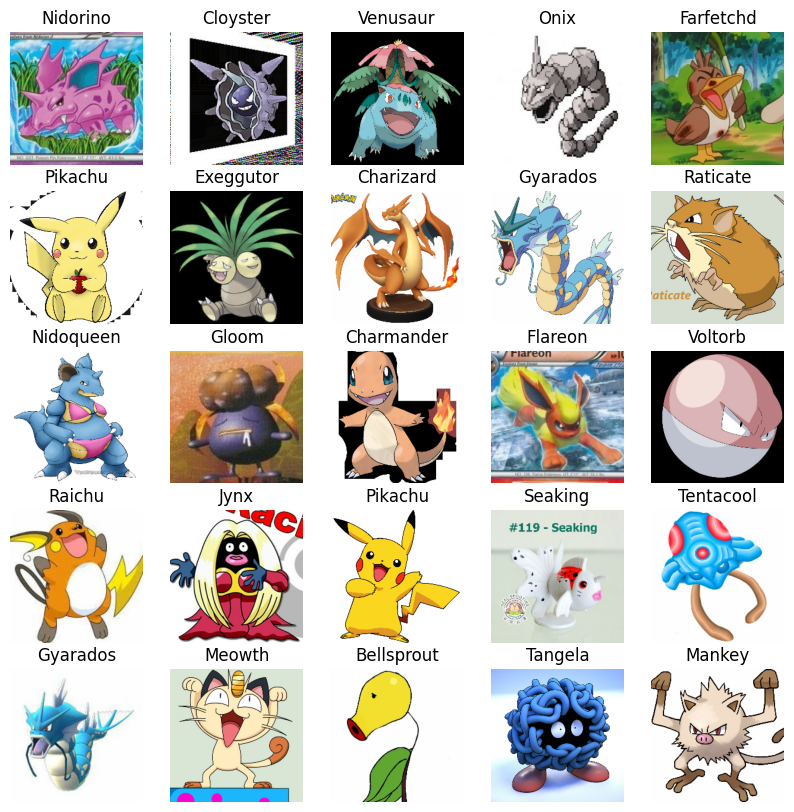

In [45]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

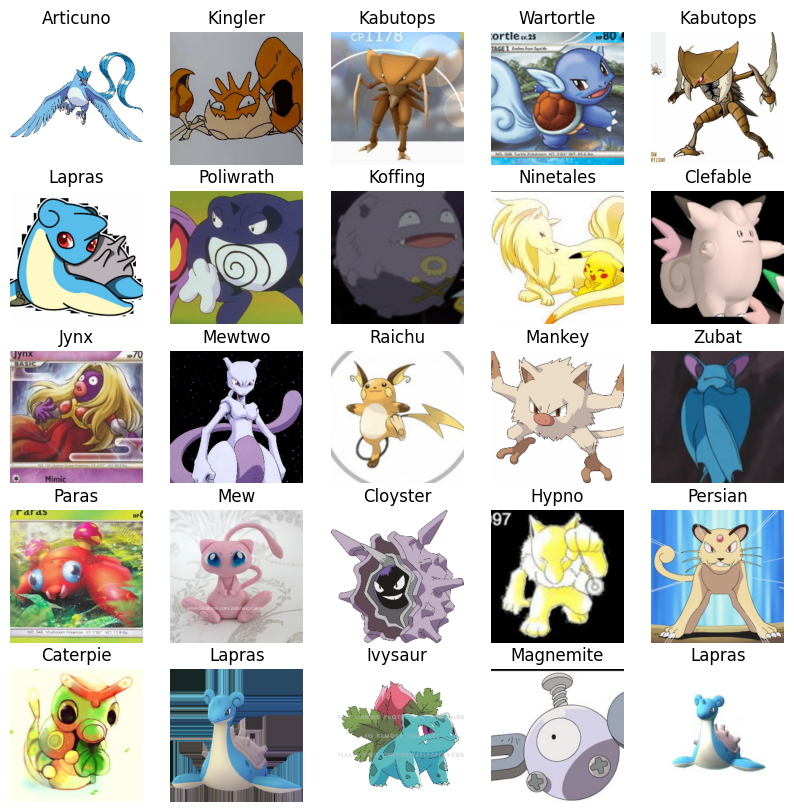

In [46]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [47]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_pokemons) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [48]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

In [ ]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 150)               150300    
                                                                 
Total params: 5,583,013
Trainable params: 150,300
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [49]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [50]:
# Check again if GPU is available (otherwise computing will take a looooonnnnggggg time)
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESS!!!!)


In [51]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 50 #@param {type:"slider", min:10, max:100, step:10}

In [52]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3) # stops after 3 rounds of no improvements

In [53]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

In [54]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/50
171/171 [==============================] - 1276s 7s/step - loss: 3.3298 - accuracy: 0.3159 - val_loss: 1.8082 - val_accuracy: 0.5645
Epoch 2/50
171/171 [==============================] - 36s 211ms/step - loss: 0.9895 - accuracy: 0.7778 - val_loss: 1.3854 - val_accuracy: 0.6686
Epoch 3/50
171/171 [==============================] - 33s 194ms/step - loss: 0.5120 - accuracy: 0.8942 - val_loss: 1.2286 - val_accuracy: 0.7016
Epoch 4/50
171/171 [==============================] - 36s 212ms/step - loss: 0.3004 - accuracy: 0.9527 - val_loss: 1.1776 - val_accuracy: 0.7119
Epoch 5/50
171/171 [==============================] - 34s 199ms/step - loss: 0.1827 - accuracy: 0.9796 - val_loss: 1.1451 - val_accuracy: 0.7192
Epoch 6/50
171/171 [==============================] - 32s 190ms/step - loss: 0.1228 - accuracy: 0.9903 - val_loss: 1.1099 - val_accuracy: 0.7273
Epoch 7/50
171/171 [==================

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/Data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [2]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [5]:
model = load_model('/content/drive/MyDrive/back/anaconda/Models/pokemon.h5')

Loading saved model from: /content/drive/MyDrive/back/anaconda/Models/pokemon.h5


In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

43/43 [==============================] - 154s 4s/step


array([[6.6600352e-09, 5.2306615e-03, 7.9027941e-06, ..., 1.3806232e-06,
        7.3865299e-06, 1.3611807e-05],
       [9.0741005e-06, 3.9144621e-09, 5.5162790e-08, ..., 1.5937789e-07,
        4.0284515e-08, 5.2162596e-07],
       [9.5973284e-08, 2.7054434e-06, 5.5395481e-06, ..., 9.9976330e-07,
        1.5887638e-06, 4.8962371e-05],
       ...,
       [1.9787597e-06, 6.7250838e-08, 7.0954948e-06, ..., 9.4713428e-08,
        1.3170579e-09, 1.4544402e-08],
       [1.3095426e-07, 7.6740362e-05, 5.7927623e-06, ..., 1.4303813e-06,
        4.5062626e-07, 1.6514829e-05],
       [1.1911847e-06, 1.4042237e-08, 4.5877260e-10, ..., 4.4430690e-09,
        8.2029290e-09, 4.4670273e-07]], dtype=float32)

In [ ]:
# Check the shape of predictions
predictions.shape

(1364, 150)

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_pokemons[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'Articuno'

In [ ]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_pokemons[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)


In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_pokemons[top_10_pred_indexes]
  print(top_10_pred_labels)

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

['Clefable' 'Jigglypuff' 'Cubone' 'Wigglytuff' 'Clefairy' 'Rhydon'
 'Nidorina' 'Gengar' 'Haunter' 'Nidorino']


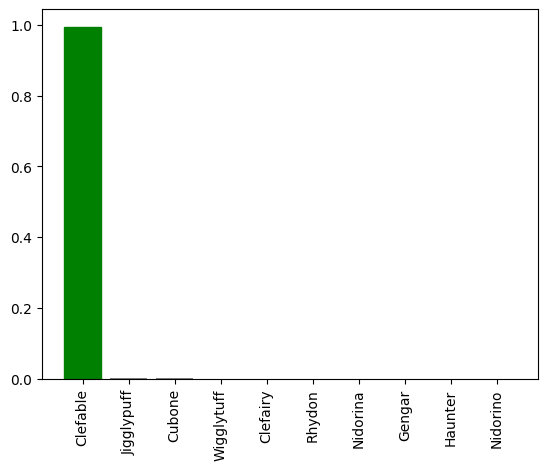

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,labels=val_labels,n=9)

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

['Articuno' 'Lapras' 'Dragonite' 'Dewgong' 'Aerodactyl' 'Seadra'
 'Dragonair' 'Pidgeot' 'Golduck' 'Moltres']
['Kingler' 'Charmander' 'Hypno' 'Krabby' 'Farfetchd' 'Psyduck' 'Paras'
 'Growlithe' 'Gloom' 'Drowzee']
['Kabutops' 'Hitmonchan' 'Beedrill' 'Primeape' 'Mewtwo' 'Dodrio'
 'Parasect' 'Spearow' 'Persian' 'Kingler']
['Snorlax' 'Seaking' 'Wartortle' 'Psyduck' 'Horsea' 'Cubone' 'Arbok'
 'Squirtle' 'Krabby' 'Dratini']
['Kabutops' 'Spearow' 'Pidgey' 'Hitmonchan' 'Dodrio' 'Pinsir' 'Electabuzz'
 'Kadabra' 'Mankey' 'Fearow']
['Tentacool' 'Bulbasaur' 'Snorlax' 'Tentacruel' 'Cubone' 'Squirtle'
 'Dewgong' 'Horsea' 'Vaporeon' 'Kingler']
['Poliwrath' 'Rhydon' 'Rattata' 'Weezing' 'Tauros' 'Arbok' 'Koffing'
 'Jigglypuff' 'Raichu' 'Nidorina']
['Koffing' 'Gastly' 'Diglett' 'Weezing' 'Raichu' 'Venonat' 'Raticate'
 'Growlithe' 'Kakuna' 'Vulpix']
['Ninetales' 'Pidgeot' 'Mankey' 'Raichu' 'Pidgey' 'Farfetchd' 'Sandshrew'
 'Sandslash' 'Persian' 'Rapidash']


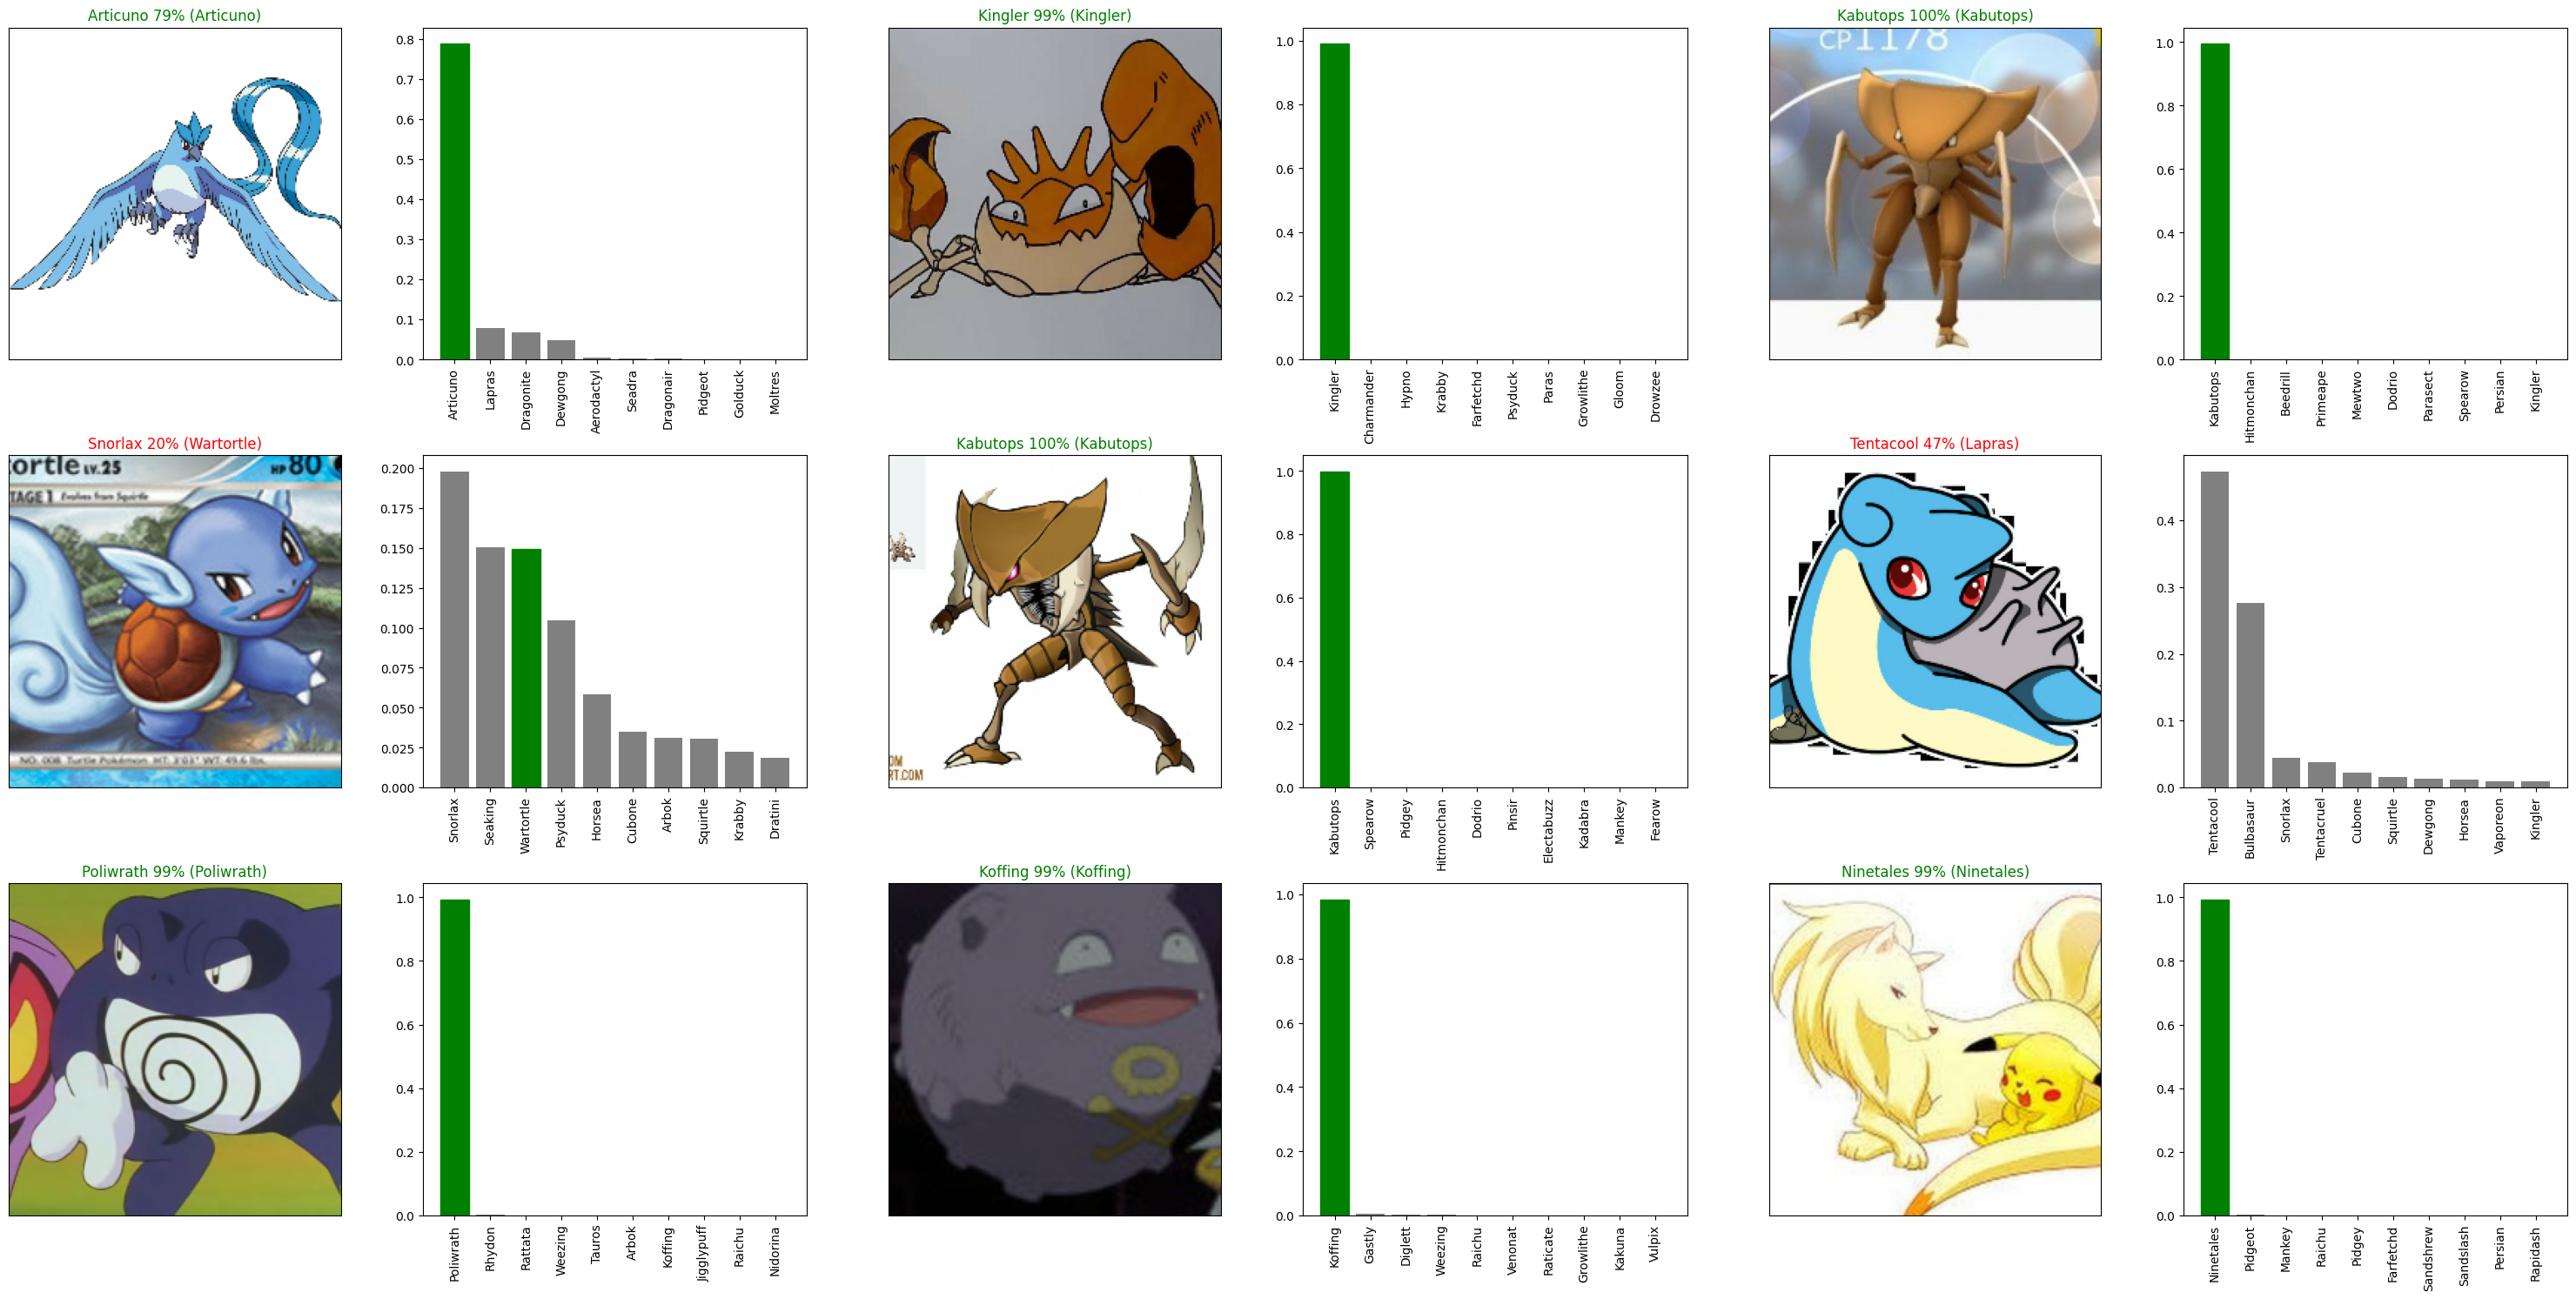

In [ ]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

Creating test data batches...
1/1 [==============================] - 0s 253ms/step


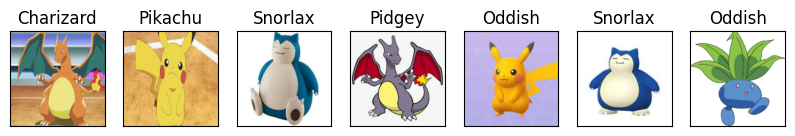

In [ ]:
# Get custom image filepaths
custom_path = "/content/drive/MyDrive/back/anaconda/datasets/pokemonsImages/custom_pokemons/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

# Turn custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)

# Make predictions on the custom data
custom_preds = model.predict(custom_data)

# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

  # Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, len(os.listdir(custom_path)), i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)